# **Tutorial:** Images as tensors

### **Install and import necessary libraries**

In [1]:
# First, let's import what we need
import torch
import matplotlib.pyplot as plt
import numpy as np
print("✅ All libraries imported!")

✅ All libraries imported!


### **What is an image?**

To a computer, an image is just a grid of numbers!

In [28]:
# Let's create a tiny 2x2 pixel image
print("Let's look at a tiny 2x2 pixel image:")
print()

# Each pixel has 3 numbers: Red, Green, Blue (RGB)
tiny_image = np.array([
    [[255, 0, 0], [0, 255, 0]],  # First row: Pure Red, Pure Green: first pixel ->[[R11, G12, B13], second pixel ->[R21, G22, B23]],
    [[0, 0, 255], [255, 255, 255]]  # Second row: Pure Blue, White
], dtype=np.uint8)

print("Our image data:")
print(tiny_image)
print()
print(f"Shape: {tiny_image.shape}")
print("This means: 2 rows tall, 2 columns wide, 3 colors per pixel")

Let's look at a tiny 2x2 pixel image:

Our image data:
[[[255   0   0]
  [  0 255   0]]

 [[  0   0 255]
  [255 255 255]]]

Shape: (2, 2, 3)
This means: 2 rows tall, 2 columns wide, 3 colors per pixel


### **Let's see this image**

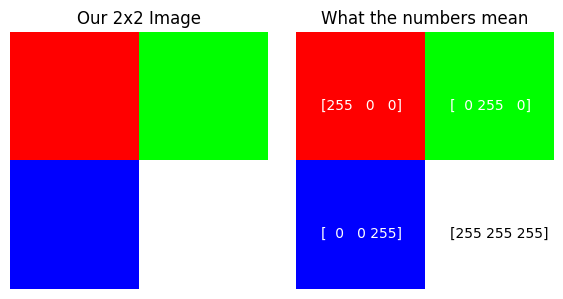

See? Top-left pixel [255, 0, 0] means:
• Red = 255 (maximum)
• Green = 0 (none)
• Blue = 0 (none)
That's why it's pure red!


In [29]:
# Display our tiny image
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(tiny_image)
plt.title("Our 2x2 Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tiny_image)
plt.title("What the numbers mean")
plt.axis('off')

# Add text to show pixel values
colors = ['Red', 'Green', 'Blue']
for i in range(2):
    for j in range(2):
        plt.text(j-0.3, i+0.1, f"{tiny_image[i,j]}", 
                fontsize=10, color='white' if sum(tiny_image[i,j]) < 384 else 'black')

plt.tight_layout()
plt.show()

print("See? Top-left pixel [255, 0, 0] means:")
print("• Red = 255 (maximum)")
print("• Green = 0 (none)")
print("• Blue = 0 (none)")
print("That's why it's pure red!")

### **From numbers to PyTorch Tensor**

In [31]:
# Convert our image to a PyTorch tensor
image_tensor = torch.from_numpy(tiny_image)

print("Converting to PyTorch tensor:")
print(f"Type: {type(image_tensor)}")
print(f"Shape: {image_tensor.shape}")
print(f"\nThe tensor:")
print(image_tensor)

Converting to PyTorch tensor:
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 2, 3])

The tensor:
tensor([[[255,   0,   0],
         [  0, 255,   0]],

        [[  0,   0, 255],
         [255, 255, 255]]], dtype=torch.uint8)


### **PyTorch wants colors first**

In [33]:
# PyTorch likes: [Colors, Height, Width] not [Height, Width, Colors]
print("PyTorch prefers a different shape...")
print(f"Current shape: {image_tensor.shape} → [Height, Width, Colors]")

# Rearrange dimensions
image_tensor_correct = image_tensor.permute(2, 0, 1) # permute to [Colors, Height, Width]

print(f"New shape: {image_tensor_correct.shape} → [Colors, Height, Width]")

print("\nWhy? Because now we can access each color channel separately:")
print(f"Red channel only: shape = {image_tensor_correct[0].shape}")
print(f"Green channel only: shape = {image_tensor_correct[1].shape}")
print(f"Blue channel only: shape = {image_tensor_correct[2].shape}")

PyTorch prefers a different shape...
Current shape: torch.Size([2, 2, 3]) → [Height, Width, Colors]
New shape: torch.Size([3, 2, 2]) → [Colors, Height, Width]

Why? Because now we can access each color channel separately:
Red channel only: shape = torch.Size([2, 2])
Green channel only: shape = torch.Size([2, 2])
Blue channel only: shape = torch.Size([2, 2])


### **Seeing color channels separately**

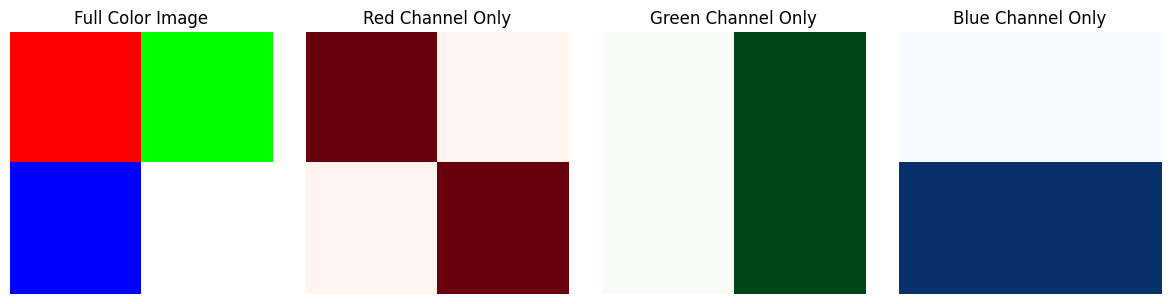

Look at the Red channel - only the red pixels are bright!
This is how computers can 'see' different colors separately.


In [35]:
plt.figure(figsize=(12, 3))

titles = ["Full Color Image", "Red Channel Only", "Green Channel Only", "Blue Channel Only"]
images = [
    tiny_image,
    image_tensor_correct[0].numpy(),
    image_tensor_correct[1].numpy(),
    image_tensor_correct[2].numpy()
]
cmaps = [None, 'Reds', 'Greens', 'Blues'] # Use color maps for single channels 

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap=cmaps[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Look at the Red channel - only the red pixels are bright!")
print("This is how computers can 'see' different colors separately.")

### **Normalization: making numbers friendlier for NN - in the range $[0.0, 1.0]$ and type float**

In [36]:
print("Right now our pixel values are 0-255 (integers).")
print("Neural networks prefer numbers between 0 and 1 (floats).\n")

# Convert to float and divide by 255
image_normalized = image_tensor_correct.float() / 255.0

print("Before normalization (integers 0-255):")
print(f"First pixel values: {image_tensor_correct[:,0,0]}") # uint means we see integers  
print()
print("After normalization (floats 0.0-1.0):")
print(f"First pixel values: {image_normalized[:,0,0]}")
print()
print(f"All values now between: {image_normalized.min():.3f} and {image_normalized.max():.3f}")

Right now our pixel values are 0-255 (integers).
Neural networks prefer numbers between 0 and 1 (floats).

Before normalization (integers 0-255):
First pixel values: tensor([255,   0,   0], dtype=torch.uint8)

After normalization (floats 0.0-1.0):
First pixel values: tensor([1., 0., 0.])

All values now between: 0.000 and 1.000


### **Let's use real photos (CIFAR10)**

In [37]:
print("Loading CIFAR-10 dataset (real photos!)...")
from torchvision import datasets, transforms

# Just convert to tensor - PyTorch does the normalization automatically
transform = transforms.ToTensor()

# Download CIFAR-10
cifar_data = datasets.CIFAR10(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

print(f"✅ Loaded {len(cifar_data)} images!")

# Get one image
real_image, label = cifar_data[0]

print(f"\nReal photo from CIFAR-10:")
print(f"Tensor shape: {real_image.shape}")
print(f"That's [3 colors, 32 pixels high, 32 pixels wide]")
print(f"Label: {label} (0=airplane, 1=car, 2=bird, etc.)")
print(f"Values are already normalized: {real_image.min():.3f} to {real_image.max():.3f}")

Loading CIFAR-10 dataset (real photos!)...
Files already downloaded and verified
✅ Loaded 50000 images!

Real photo from CIFAR-10:
Tensor shape: torch.Size([3, 32, 32])
That's [3 colors, 32 pixels high, 32 pixels wide]
Label: 6 (0=airplane, 1=car, 2=bird, etc.)
Values are already normalized: 0.000 to 1.000


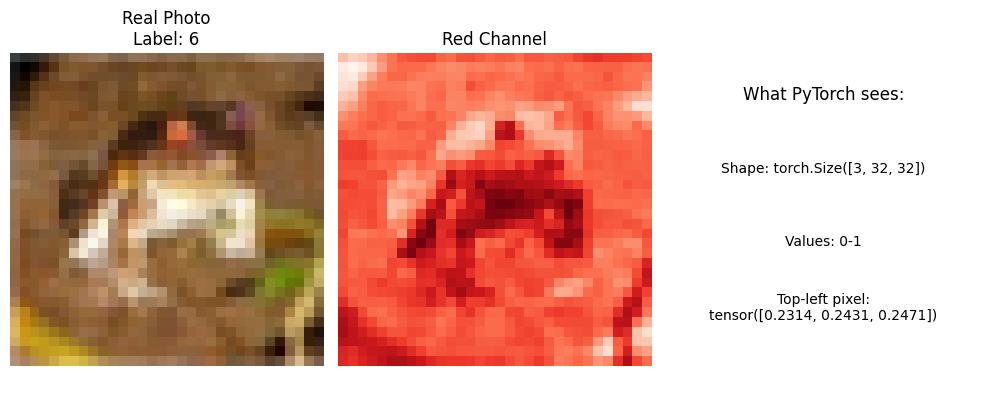

In [38]:
# Display the real photo
plt.figure(figsize=(10, 4))

# Full image
plt.subplot(1, 3, 1)
image_for_display = real_image.permute(1, 2, 0)  # Convert back for display
plt.imshow(image_for_display)
plt.title(f"Real Photo\nLabel: {label}")
plt.axis('off')

# Red channel
plt.subplot(1, 3, 2)
plt.imshow(real_image[0], cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

# All channels as numbers
plt.subplot(1, 3, 3)
plt.text(0.5, 0.8, "What PyTorch sees:", ha='center', fontsize=12)
plt.text(0.5, 0.6, f"Shape: {real_image.shape}", ha='center', fontsize=10)
plt.text(0.5, 0.4, f"Values: 0-1", ha='center', fontsize=10)
plt.text(0.5, 0.2, f"Top-left pixel:\n{real_image[:,0,0]}", ha='center', fontsize=10)
plt.axis('off')
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

## 8. Let's Look at More Images

Let's look at 9 different photos from CIFAR-10:


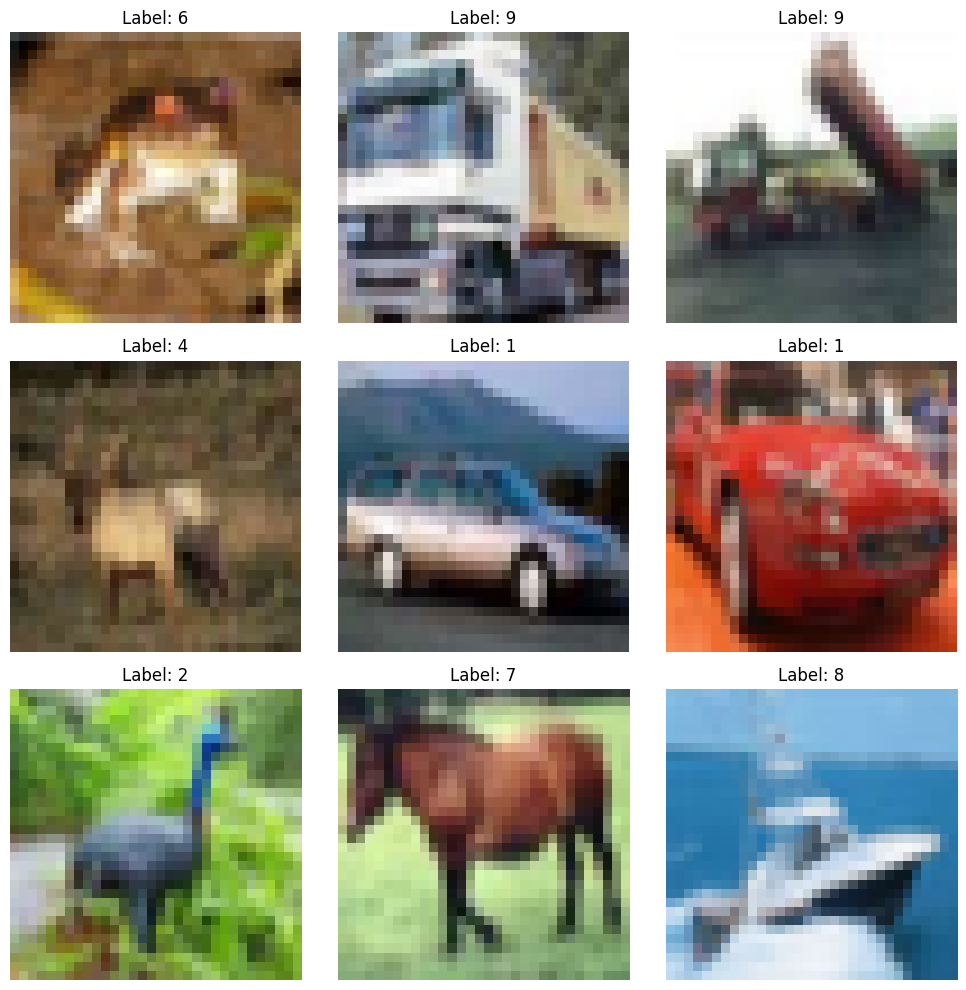

Each of these is stored as a tensor with shape [3, 32, 32]


In [12]:
print("Let's look at 9 different photos from CIFAR-10:")

plt.figure(figsize=(10, 10))

for i in range(9):
    image, label = cifar_data[i]
    
    plt.subplot(3, 3, i+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Each of these is stored as a tensor with shape [3, 32, 32]")

## 9. Simple Practice: Check Your Understanding

In [13]:
def check_image(tensor):
    """Check if a tensor is ready for PyTorch"""
    print(f"\nChecking tensor:")
    print(f"Shape: {tensor.shape}")
    print(f"Data type: {tensor.dtype}")
    print(f"Value range: {tensor.min():.3f} to {tensor.max():.3f}")
    
    # Check if it's correct
    correct = True
    
    if tensor.shape[0] != 3:
        print("❌ First dimension should be 3 (for RGB)")
        correct = False
    else:
        print("✅ Correct shape: [3, H, W]")
        
    if tensor.dtype != torch.float32:
        print("❌ Should be float32")
        correct = False
    else:
        print("✅ Correct type: float32")
        
    if not (0 <= tensor.min() <= tensor.max() <= 1):
        print("❌ Values should be between 0 and 1")
        correct = False
    else:
        print("✅ Values are 0-1")
    
    if correct:
        print("\n🎉 Perfect! This tensor is ready for PyTorch!")
    else:
        print("\n⚠️  Needs some adjustments for PyTorch")
    
    return correct

# Check our real image
check_image(real_image)


Checking tensor:
Shape: torch.Size([3, 32, 32])
Data type: torch.float32
Value range: 0.000 to 1.000
✅ Correct shape: [3, H, W]
✅ Correct type: float32
✅ Values are 0-1

🎉 Perfect! This tensor is ready for PyTorch!


True

## 10. Summary: The 3 Steps

In [14]:
print("=" * 50)
print("📚 SUMMARY: 3 SIMPLE STEPS")
print("=" * 50)

print("\nTo use images in PyTorch, just remember:")
print()
print("1️⃣ CONVERT TO TENSOR")
print("   images → torch.tensor(images)")
print()
print("2️⃣ REARRANGE SHAPE")
print("   [H, W, C] → [C, H, W] (Colors first!)")
print()
print("3️⃣ NORMALIZE VALUES")
print("   0-255 → 0-1 (floats)")

print("\n" + "=" * 50)
print("🎯 PyTorch does steps 1 & 3 automatically with transforms.ToTensor()!")
print("=" * 50)

📚 SUMMARY: 3 SIMPLE STEPS

To use images in PyTorch, just remember:

1️⃣ CONVERT TO TENSOR
   images → torch.tensor(images)

2️⃣ REARRANGE SHAPE
   [H, W, C] → [C, H, W] (Colors first!)

3️⃣ NORMALIZE VALUES
   0-255 → 0-1 (floats)

🎯 PyTorch does steps 1 & 3 automatically with transforms.ToTensor()!


## 11. Try It Yourself!

Create your own 3x3 image:
Your image as a PyTorch tensor:
Shape: torch.Size([3, 3, 3])
First pixel: tensor([1., 0., 0.])


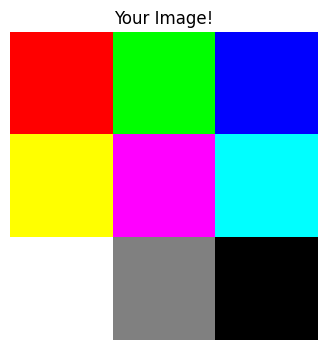


🎉 You just created an image tensor for PyTorch!


In [15]:
# Create your own tiny image
print("Create your own 3x3 image:")

# Make a simple pattern
my_image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]],
    [[255, 255, 255], [128, 128, 128], [0, 0, 0]]
], dtype=np.uint8)

# Convert to PyTorch tensor
my_tensor = torch.from_numpy(my_image).permute(2, 0, 1).float() / 255.0

print("Your image as a PyTorch tensor:")
print(f"Shape: {my_tensor.shape}")
print(f"First pixel: {my_tensor[:,0,0]}")

# Display it
plt.figure(figsize=(4, 4))
plt.imshow(my_image)
plt.title("Your Image!")
plt.axis('off')
plt.show()

print("\n🎉 You just created an image tensor for PyTorch!")

## What's Next?

Now that you understand images as tensors, you can:
1. Use these tensors to train a neural network
2. Apply filters or transformations
3. Build your first image classifier!

Remember: **Images are just numbers, and PyTorch tensors are how we work with those numbers.**

In [16]:
print("\n🌟 CONGRATULATIONS! 🌟")
print("You now understand the foundation of computer vision!")
print("Images → Numbers → Tensors → Neural Networks")


🌟 CONGRATULATIONS! 🌟
You now understand the foundation of computer vision!
Images → Numbers → Tensors → Neural Networks


---

<p style="text-align: right; font-size:14px; color:gray;">
<b>Prepared by:</b><br>
Manuel Eugenio Morocho-Cayamcela
</p>